In [11]:
# import libraries
import pandas as pd
import numpy as np

# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression


# Scikit-learn (machine learning)
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Import libraries and modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

# Import scit-Learn module for the algorithm/model: Linear Regression
from sklearn.model_selection import train_test_split

# Import scit-Learn module for K-fold cross-validation - algorithm/model evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [12]:
# The raw file has no header row, so we add column names manually
col_names = [
    "Age", "Emp_type", "Fnlwgt", "Education",
    "Education_num", "Martial", "Occupation",
    "Relationship", "Race", "Sex", "Capital_gain", "Capital_loss", "weekly_hours", "Country", "Income"
]

In [13]:
df = pd.read_csv('C:/Users/DKell/Downloads/adult_salary.csv', header=None, names=col_names)

In [14]:
# Quick look at the data
print(df.head())
print(df.info())
print(df.isnull().sum())

   Age           Emp_type  Fnlwgt   Education  Education_num  \
0  Age           Emp_type  Fnlwgt   Education  Education_num   
1   39          State-gov   77516   Bachelors             13   
2   50   Self-emp-not-inc   83311   Bachelors             13   
3   38            Private  215646     HS-grad              9   
4   53            Private  234721        11th              7   

               Martial          Occupation    Relationship    Race    Sex  \
0              Marital          Occupation    Relationship    Race    Sex   
1        Never-married        Adm-clerical   Not-in-family   White   Male   
2   Married-civ-spouse     Exec-managerial         Husband   White   Male   
3             Divorced   Handlers-cleaners   Not-in-family   White   Male   
4   Married-civ-spouse   Handlers-cleaners         Husband   Black   Male   

   Capital_gain  Capital_loss  weekly_hours         Country  Income  
0  Capital_gain  Capital_loss  weekly_hours         Country  Income  
1          2

In [21]:
#Check for abnormalmalities

print(df.describe())

# Replace '?' with proper missing values
df = df.replace('?', np.nan)

                Age        Fnlwgt  Education_num  Capital_gain  weekly_hours  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     40.422382   
std       13.710510  1.056040e+05       2.570973   7452.019058     12.391444   
min       17.000000  1.228500e+04       1.000000      0.000000      1.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000     40.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000     40.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000     45.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000     99.000000   

       Income  
count     0.0  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN  


In [16]:
# Check for zero or negative values in numeric columns
numeric_cols = ["Age","Education_num","Capital_gain", "Capital_loss",
                "weekly_hours","Income"]

for col in numeric_cols:
    # Convert column to numeric type first, with errors='coerce' to handle non-numeric values
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(col, (df[col] <= 0).sum(), "values <= 0")

Age 0 values <= 0
Education_num 0 values <= 0
Capital_gain 44807 values <= 0
Capital_loss 46560 values <= 0
weekly_hours 0 values <= 0
Income 0 values <= 0


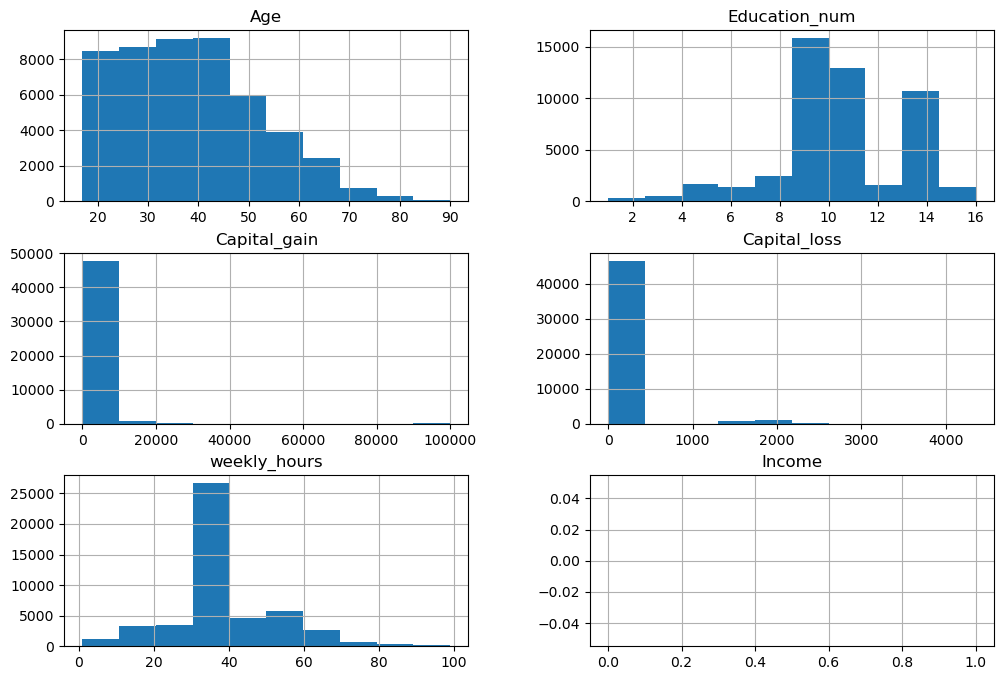

In [17]:
# Pliot histogram for each numberic variable/attribute of the dataset
# VIP NOTES: The first variable ID is also plotted. However the plot should be ignored

df.hist(figsize=(12, 8))
plt.show()

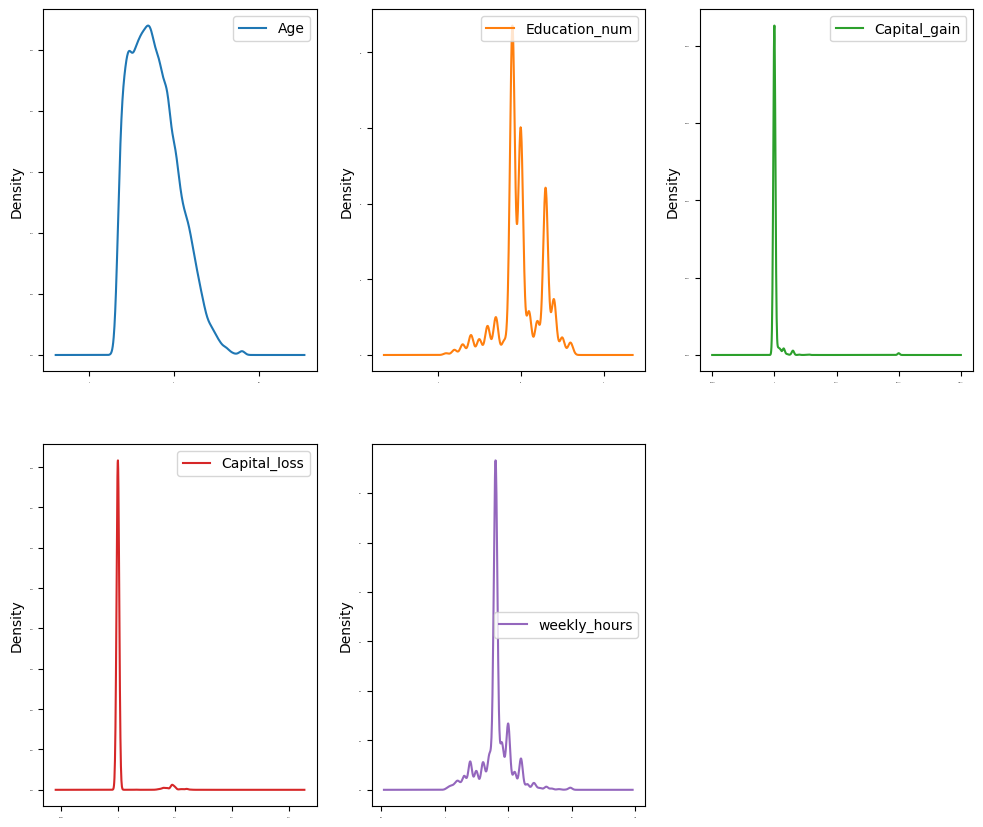

In [26]:
# Destiny plots
# IMPORTANT NOTES: 5 numberic variables --> at least 5 plots --> layout (2, 3): 2 rows, each row with 3 plots

df.plot(kind='density', subplots=True, layout=(3, 3),
        sharex=False, legend=True, fontsize=1, figsize=(12, 16))
plt.show()

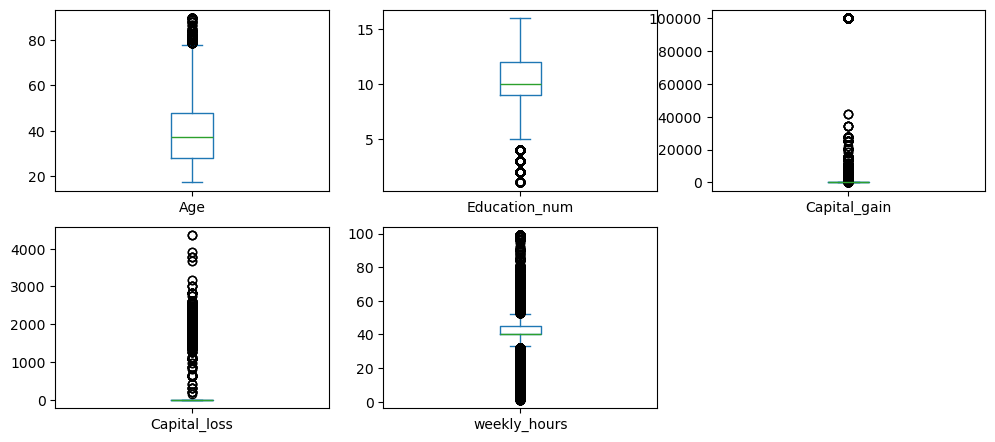

In [25]:
df.plot(kind='box', subplots=True, layout=(3, 3),
        sharex=False, sharey=False, figsize=(12, 8))
plt.show()

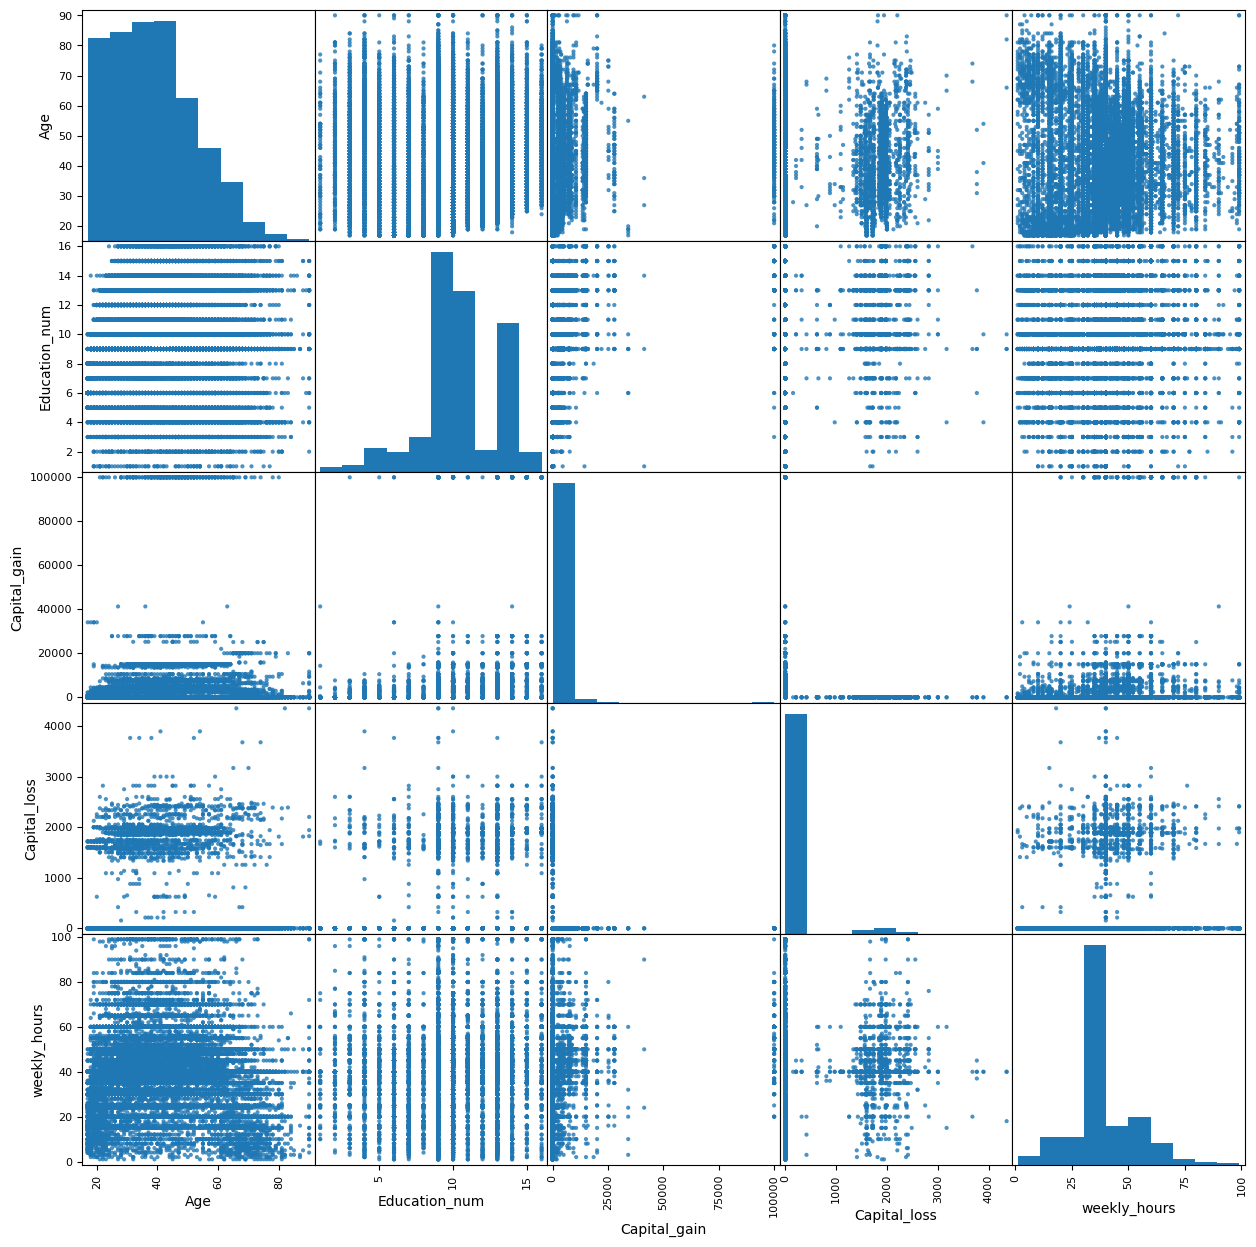

In [24]:
# scatter plot matrix

scatter_matrix(df, alpha=0.8, figsize=(15,15))
plt.show()

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv("adult_salary.csv")

# Replace '?' with NaN
df = df.replace('?', np.nan)

# Drop Fnlwgt (per instructions)
df = df.drop(columns=['Fnlwgt'])

# Drop rows where Income (target) is missing
df = df.dropna(subset=['Income'])

# Separate X and y
X = df.drop(columns=['Income'])
y = df['Income']

print(X.columns)

Index(['Age', 'Emp_type', 'Education', 'Education_num', 'Marital',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'weekly_hours', 'Country'],
      dtype='object')


In [28]:
# Save cleaned dataset for submission
df_clean.to_csv("adult_salary.csv", index=False)

In [23]:
# Identify numeric and categorical features from X (Income NOT included)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

numeric_transformer = SimpleImputer(strategy='median')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Identify numeric and categorical features from X (Income NOT included)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

numeric_transformer = SimpleImputer(strategy='median')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

log_reg = LogisticRegression(max_iter=1000)

# New clf specifically for adult_salary
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', log_reg)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

# Fit the model
clf.fit(X_train, y_train)

# Sanity check: what columns does this clf expect?
print("Columns used by clf:")
print(clf.named_steps['preprocess'].feature_names_in_)

Numeric features: ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'weekly_hours']
Categorical features: ['Emp_type', 'Education', 'Marital', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']


NameError: name 'SimpleImputer' is not defined

In [43]:
# Convert y_train to a pandas Series
y_train = pd.Series(y_train)

print("y_train shape:", y_train.shape)
print("y_train head:")
print(y_train.head())

print("\nNaNs in y_train:", y_train.isna().sum())
print("Number of non-NaN labels in y_train:",
      y_train.shape[0] - y_train.isna().sum())

y_train shape: (2824,)
y_train head:
0    1
1    0
2    1
3    0
4    0
dtype: int32

NaNs in y_train: 0
Number of non-NaN labels in y_train: 2824


In [58]:
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
print(scores.mean())

clf.predict(new_records)

0.5016073753777361


array([0, 0], dtype=int32)

In [45]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = SimpleImputer(strategy='median')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

log_reg = LogisticRegression(max_iter=1000)

# THIS is your new clf for adult_salary
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', log_reg)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

clf.fit(X_train, y_train)

# Quick sanity check: which columns does this clf expect now?
print("Columns used by clf:")
print(clf.named_steps['preprocess'].feature_names_in_)

Columns used by clf:
['age' 'income' 'years_experience' 'gender' 'education' 'occupation']


In [46]:
# Quick check: which columns does this clf expect now?
print("Columns used by clf:")
print(clf.named_steps['preprocess'].feature_names_in_)

Columns used by clf:
['age' 'income' 'years_experience' 'gender' 'education' 'occupation']


In [36]:
# Two new random records
new_records = pd.DataFrame([

    # Record 1
    {
        "age": 47,
        "Emp_type": "Self-emp-not-inc",
        "education": "Some-college",
        "Education_num": 10,
        "income": 40000,
        "years_experience": 2,
        "Marital": "Divorced",
        "occupation": "Tech-support",
        "Relationship": "Not-in-family",
        "Race": "White",
        "gender": "Male",
        "Capital_gain": 0,
        "Capital_loss": 0,
        "weekly_hours": 50,
        "Country": "United-States"
    },

    # Record 2
    {
        "age": 31,
        "Emp_type": "State-gov",
        "education": "Masters",
        "Education_num": 14,
        "income": 100000,
        "years_experience": 15,
        "Marital": "Never-married",
        "occupation": "Exec-managerial",
        "Relationship": "Unmarried",
        "Race": "Asian-Pac-Islander",
        "gender": "Female",
        "Capital_gain": 1500,
        "Capital_loss": 0,
        "weekly_hours": 42,
        "Country": "India"
    }

])

new_pred = clf.predict(new_records)
new_proba = clf.predict_proba(new_records)

for i, (label, probs) in enumerate(zip(new_pred, new_proba), start=1):
    print(f"Record {i}: predicted Income = {label}, Probabilities = {probs}")

Record 1: predicted Income = 0, Probabilities = [0.57114894 0.42885106]
Record 2: predicted Income = 0, Probabilities = [0.56704543 0.43295457]


In [48]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kfold = KFold(n_splits=10, shuffle=True, random_state=7)

neg_mse_scores = cross_val_score(
    clf,  # ✅ use the pipeline, not plain model
    X,
    y,
    cv=kfold,
    scoring="neg_mean_squared_error"
)

r2_scores = cross_val_score(
    clf,
    X,
    y,
    cv=kfold,
    scoring="r2"
)

rmse_scores = np.sqrt(-neg_mse_scores)

rmse_mean = rmse_scores.mean()
rmse_std = rmse_scores.std()
r2_mean = r2_scores.mean()
r2_std = r2_scores.std()

print("=== 10-fold Cross-validation Results ===")
print(f"RMSE Mean: {rmse_mean:.3f}")
print(f"RMSE Std Dev: {rmse_std:.3f}")
print(f"R² Mean: {r2_mean:.3f}")
print(f"R² Std Dev: {r2_std:.3f}")

=== 10-fold Cross-validation Results ===
RMSE Mean: 0.703
RMSE Std Dev: 0.019
R² Mean: -0.989
R² Std Dev: 0.099


In [51]:
# Use only numeric columns for linear regression
X_num = X.select_dtypes(include=["int64", "float64"]).copy()

num_folds = 5
seed = 7

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

scoring = "neg_mean_squared_error"

results = cross_val_score(model, X_num, y, cv=kfold, scoring=scoring)

print("Mean neg-MSE:", results.mean())
print("Mean RMSE:", np.sqrt(-results).mean())

Mean neg-MSE: -0.2506539874557835
Mean RMSE: 0.5006509277994121
